# Import Packages 

In [100]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Exploratory Data Analysis


In [102]:
path = 'nhgh.tsv'
df =  df = pd.read_csv(path, sep='\t', encoding='utf-8')
df.head(5)

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79


# Overview of Dataset

In [104]:
# Display all headers (columns) of the DataFrame
headers = df.columns
print(headers)

Index(['seqn', 'sex', 'age', 're', 'income', 'tx', 'dx', 'wt', 'ht', 'bmi',
       'leg', 'arml', 'armc', 'waist', 'tri', 'sub', 'gh', 'albumin', 'bun',
       'SCr'],
      dtype='object')


In [105]:
# Check for missing values
print(df.isnull().sum())

seqn         0
sex          0
age          0
re           0
income     320
tx           0
dx           0
wt           0
ht           0
bmi          0
leg        231
arml       179
armc       188
waist      239
tri        481
sub        971
gh           0
albumin     89
bun         89
SCr         89
dtype: int64


In [106]:
# Drop columns with missing values
df = df.dropna(axis=1)

# Define binary target variable for diabetes prediction
df['diabetes'] = (df['gh'] >= 6.5).astype(int)


#Create new columns which represents sex of person
df = pd.get_dummies(df, columns=['sex'])

# Assuming 'race' is a categorical variable that needs encoding
# Example using Label Encoding
label_encoder = LabelEncoder()
df['re'] = label_encoder.fit_transform(df['re'])

# Display the first few rows of the cleaned dataset to verify
print("Cleaned dataset after dropping columns with missing values:")
print(df.head())

Cleaned dataset after dropping columns with missing values:
    seqn        age  re  tx  dx     wt     ht    bmi   gh  diabetes  \
0  51624  34.166667   2   0   0   87.4  164.7  32.22  5.2         0   
1  51626  16.833333   1   0   0   72.3  181.3  22.00  5.7         0   
2  51628  60.166667   1   1   1  116.8  166.0  42.39  6.0         0   
3  51629  26.083333   0   0   0   97.6  173.0  32.61  5.1         0   
4  51630  49.666667   2   0   0   86.7  168.4  30.57  5.3         0   

   sex_female  sex_male  
0       False      True  
1       False      True  
2        True     False  
3       False      True  
4        True     False  


The code above shows that there are certain variables that have missing values, which might affect the final results of the training, so we must remove them. Upon further inspection, the key variable 'gh' is not affected, so we will proceed to drop the columns that have missing values.

Also, after expermenting further, the 'sex' column would cause training issues because its "String" and it would be unable to be converted to float. The following code "pd.get_dummies" will change the 'sex' column to 'sex_female' and 'sex_male' which will give us binary values of 0/1 if the person is either a male / female.

Also, race is a categorial variable, which means that it causes the same problem as 'sex'. I have used a label encoder to fit the model which only uses numerical data for training.

# Identify Features and Target Variable

After dropping the columns that have null values and also adding a new binary variable that predicts for diabetes, we are left with 11 columns. 

In [110]:
# Assuming 'gh' is the feature and 'diabetes' is the target variable
X = df.drop(columns=['gh', 'diabetes'])  # Features excluding 'gh' and 'diabetes'
y = df['diabetes']  # Target variable 'diabetes'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify dimensions of split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5436, 10)
X_test shape: (1359, 10)
y_train shape: (5436,)
y_test shape: (1359,)


# Train and Test Logistic Regression Model

In [112]:

# Initialize logistic regression model
log_model = LogisticRegression(max_iter = 100000, random_state=42)

# Train the model on the training data
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=42)

In [113]:
# Predict on the test data
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report (more detailed evaluation)
print(classification_report(y_test, y_pred))

Accuracy: 0.9389256806475349
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1224
           1       0.71      0.64      0.68       135

    accuracy                           0.94      1359
   macro avg       0.84      0.81      0.82      1359
weighted avg       0.94      0.94      0.94      1359



Class 0 (Non Diabetes) - The model performs very well with high precision (0.96) and recall (0.97), indicating that it correctly identifies non-diabetes cases.
Class 1 (Diabetes) - The model's performance is lower compared to class 0, with precision (0.71) and recall (0.64). This suggests that the model correctly identifies diabetes cases, but there is room for improvement

Potential next steps: 
Feature Engineering: Explore additional features or transformations that could potentially improve the model's performance.
Model Tuning: Experiment with hyperparameter tuning 

# Decision Tree Model

Interpretation of Confusion Matrix:
True Positive (TP): Predicted diabetes correctly. (87)
False Positive (FP): Predicted diabetes incorrectly. (35)
True Negative (TN): Predicted non-diabetes correctly. (1189)
False Negative (FN): Predicted non-diabetes incorrectly (48)

In [117]:
# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Classification report (more detailed evaluation)
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9028697571743929
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1224
           1       0.51      0.59      0.54       135

    accuracy                           0.90      1359
   macro avg       0.73      0.76      0.75      1359
weighted avg       0.91      0.90      0.91      1359



Decision Tree Accuracy: Measures the overall correctness of the prediction of the model

About 90.29% of the predictions made by the model were correct
F1 score for diabetes is 0.54. The F1 Metric is useful for understanding overall performance in capturing true positives vs false positives.

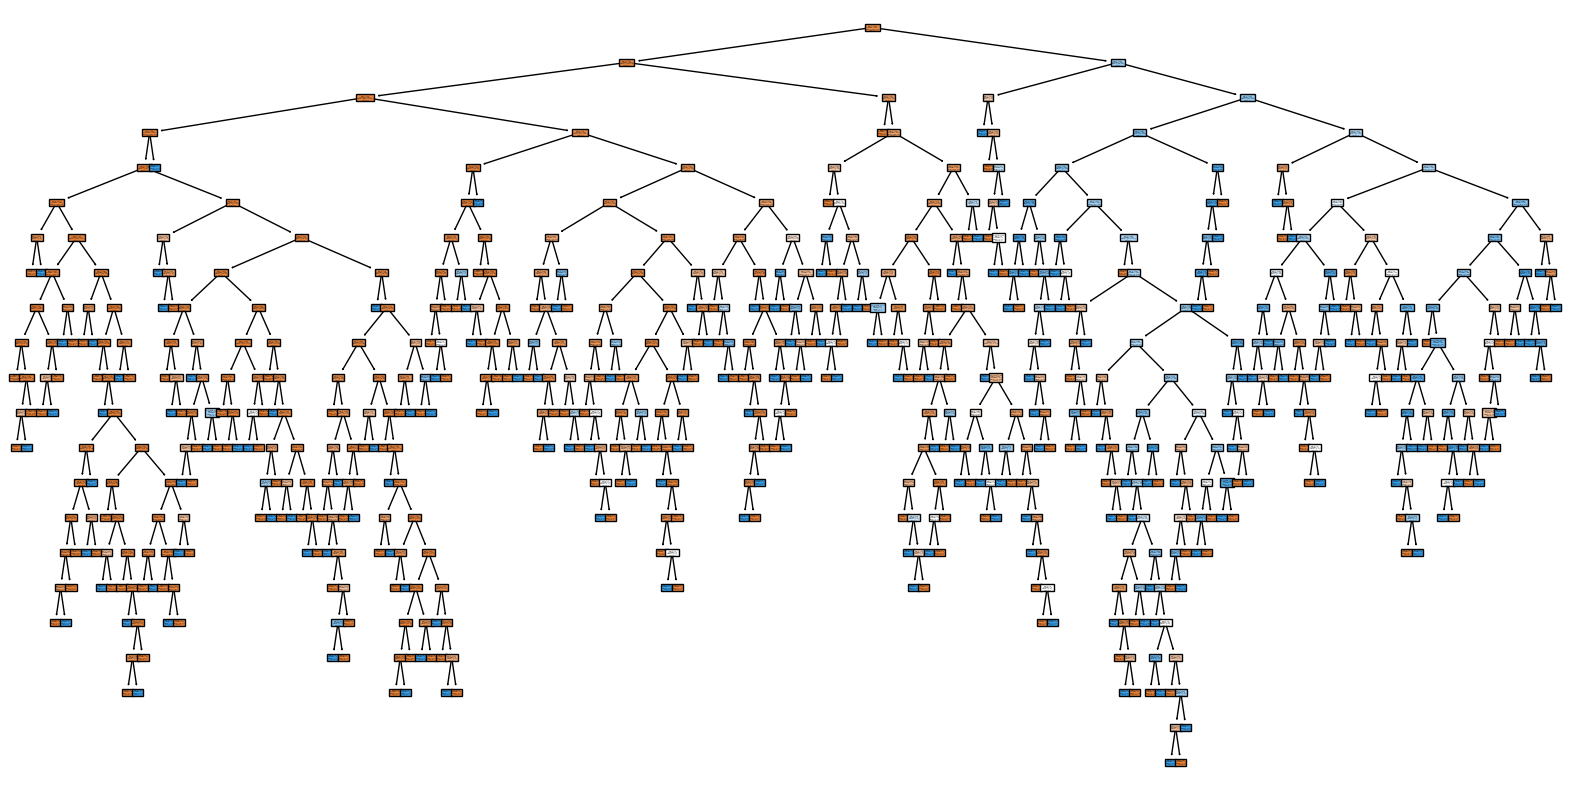

In [119]:
#Visualize Decision Tree 
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

orange nodes are 0 (non diabetes) while blue nodes are 1 (diabetes)

Hyperparameter Tuning can be used to further improve the decision tree model

# Finetune Decision Tree Model

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.9227373068432672
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1224
           1       0.61      0.60      0.61       135

    accuracy                           0.92      1359
   macro avg       0.78      0.78      0.78      1359
weighted avg       0.92      0.92      0.92      1359



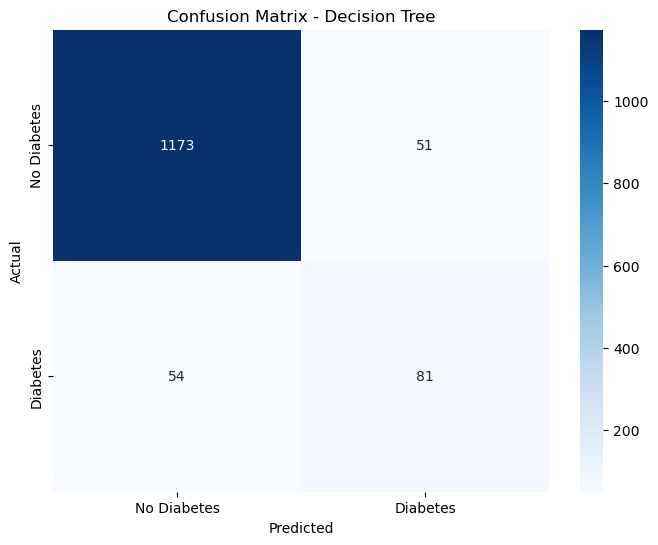

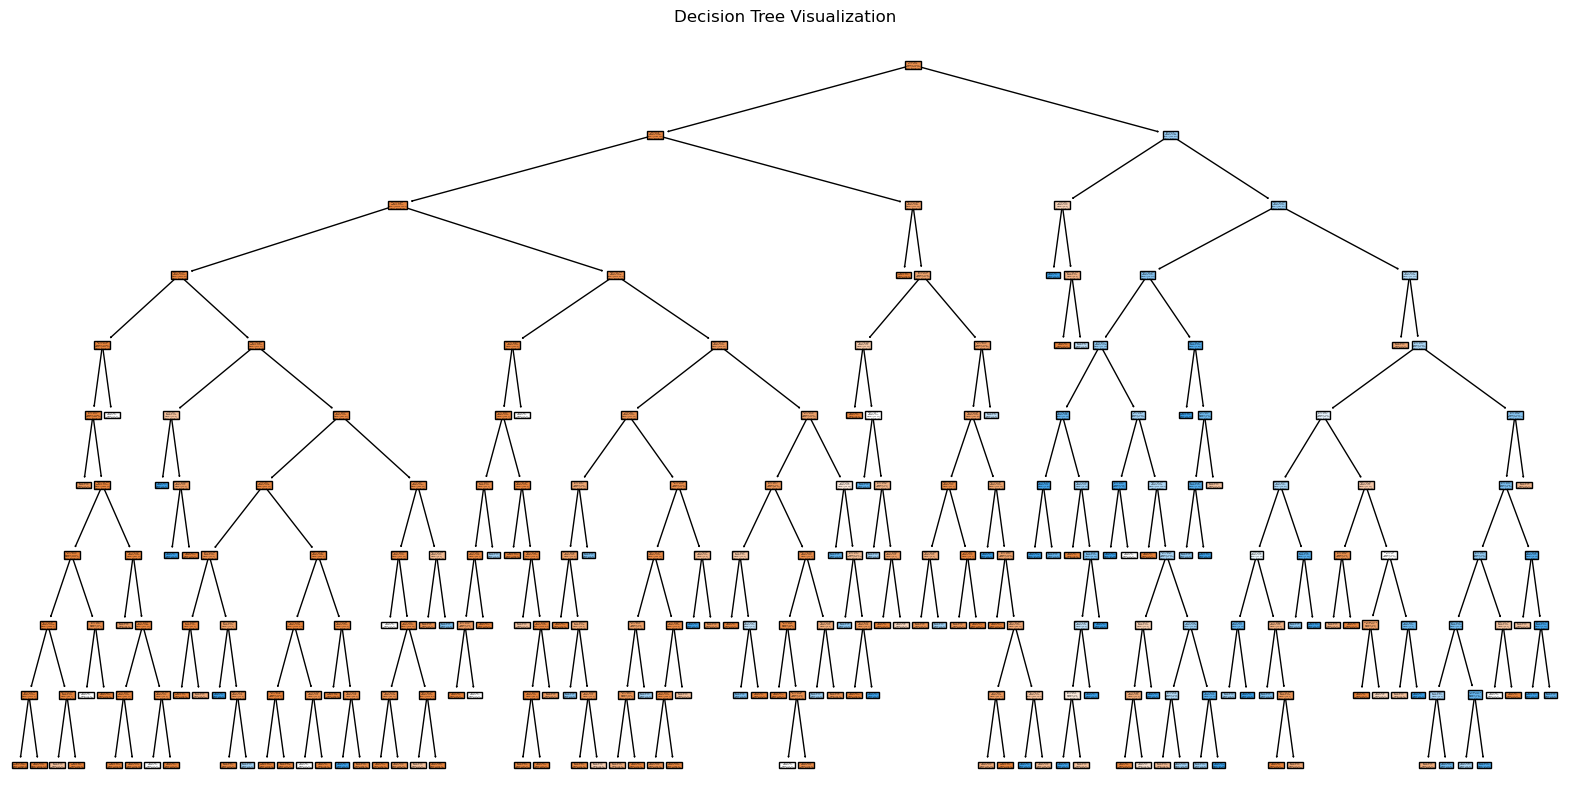

In [122]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Visualize the decision tree (optional)
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree Visualization')
plt.show()

GridSearchCV is a technique for optimizing machine learning models by systematically testing combinations of hyperparameters from a defined grid. It uses cross-validation to evaluate each combination. By selecting the best-performing set of hyperparameters based on a specified metric.

Improved Accuracy: 0.9227373068432672
F1 Score of diabetes: 0.61

# Random Forest 

In [125]:

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report (more detailed evaluation)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.94186902133922
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1224
           1       0.73      0.67      0.69       135

    accuracy                           0.94      1359
   macro avg       0.84      0.82      0.83      1359
weighted avg       0.94      0.94      0.94      1359



Overall Random Forest Accuracy: 0.942%

F1 Score for diabetes is 0.69

So far, overall it performs the best out of all models. 

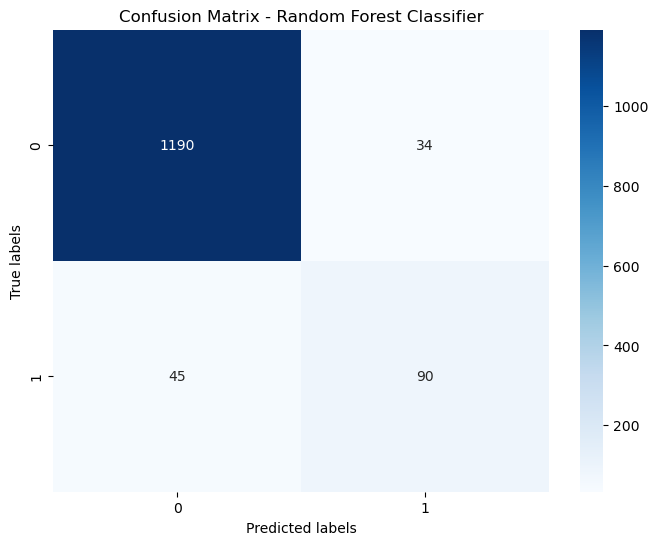

In [127]:
# Generate confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


# Finetune Random Forest Model

True Positive (TP): Predicted diabetes correctly. (90)
False Positive (FP): Predicted diabetes incorrectly. (34)
True Negative (TN): Predicted non-diabetes correctly. (1190)
False Negative (FN): Predicted non-diabetes incorrectly (45)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9440765268579838
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1224
           1       0.73      0.70      0.71       135

    accuracy                           0.94      1359
   macro avg       0.85      0.83      0.84      1359
weighted avg       0.94      0.94      0.94      1359



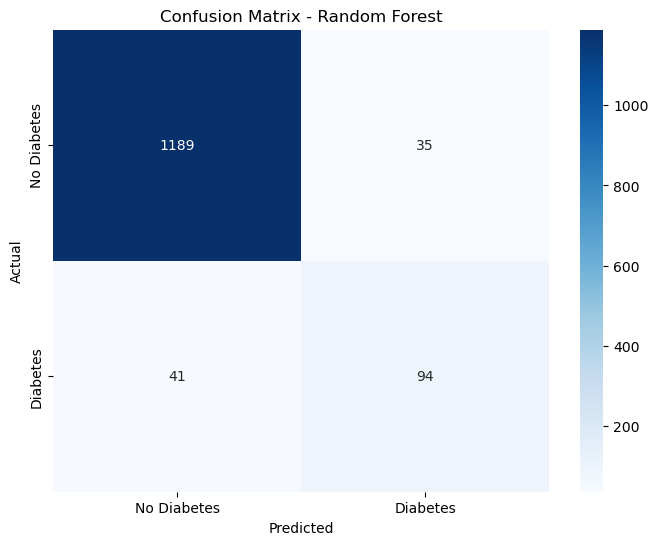

In [131]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Improved Overall Random Forest Accuracy: 0.944%

F1 Score for diabetes is 0.71

So far, overall it performs the best out of all models. 

# Conclusion 

The fine-tuned Random Forest model exhibits robust performance in predicting diabetes with an accuracy of 94.4%. It achieves high precision (97% for non-diabetes and 73% for diabetes) and recall (97% for non-diabetes and 70% for diabetes), indicating accurate identification of both classes. The model's balanced F1-scores (97% for non-diabetes and 73% for diabetes)